In [111]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
import regex
import random
import matplotlib.pyplot as plt
from unicodedata import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from wordcloud import WordCloud, get_single_color_func
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

In [94]:
# Add Lemmatizer to CountVectorizer
# https://scikit-learn.org/stable/modules/feature_extraction.html

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer:
     def __init__(self):
         self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
         return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

# Explore data

In [120]:
# Import dataset
df = pd.read_csv("un_gen_debates_text.csv")

In [3]:
df.head()

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


In [121]:
df.text[0]

"33: May I first convey to our President the congratulations of the Albanian delegation on his election to the Presidency of the twenty-fifth session of the General Assembly?\n34.\tIn taking up the work on the agenda of the twenty- fifth session of the General Assembly, which is being held on the eve of the twenty-fifth anniversary of the coming into force of the Charter of the United Nations, the peace-loving Member States would have wished to be in a position to present on this occasion some picture of positive and satisfactory activity on the part of the United Nations. The Albanian delegation, for its part, would have taken great pleasure in drawing up such a balance sheet of activities covering a quarter of a century, which is certainly no short period in the life of an international organization. Unfortunately, this is not the situation. Created on the day after victory had been achieved over the Powers of the Rome BerlinTokyo Axis and conceived in the spirit of the principles wh

In [122]:
# Remove the sentence number index
df['text'] = df['text'].replace(r'\d+.','', regex=True)
# Remove tabs
df['text'] = df['text'].replace(r'\t','', regex=True)
# Remove line breaks
df['text'] = df['text'].replace(r'\n',' ', regex=True)

In [123]:
# Check again
df.text[0]

" May I first convey to our President the congratulations of the Albanian delegation on his election to the Presidency of the twenty-fifth session of the General Assembly? In taking up the work on the agenda of the twenty- fifth session of the General Assembly, which is being held on the eve of the twenty-fifth anniversary of the coming into force of the Charter of the United Nations, the peace-loving Member States would have wished to be in a position to present on this occasion some picture of positive and satisfactory activity on the part of the United Nations. The Albanian delegation, for its part, would have taken great pleasure in drawing up such a balance sheet of activities covering a quarter of a century, which is certainly no short period in the life of an international organization. Unfortunately, this is not the situation. Created on the day after victory had been achieved over the Powers of the Rome BerlinTokyo Axis and conceived in the spirit of the principles which predo

# Word Cloud

In [9]:
# Join all the speeches to make a wordcloud
text = " ".join(speech for speech in df.text)

In [10]:
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

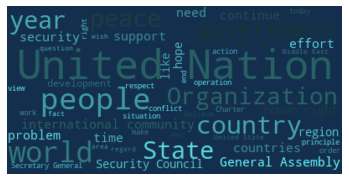

In [11]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=ENGLISH_STOP_WORDS, background_color="#142f4e",max_font_size=50, max_words=50).generate(text)

# Display the generated image:

plt.imshow(wordcloud.recolor(color_func=get_single_color_func("#5ce1e6"), random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
# Save the image
wordcloud.to_file("./Plots/word_cloud.png")

# First stab at LDA: No max_df set

In [13]:
# 2: create dtm
vec = CountVectorizer(stop_words = 'english')
X = vec.fit_transform(df["text"])


In [14]:
# 3 create lda
lda = LatentDirichletAllocation(n_components=5)

In [15]:
# 4 fit lda
doc_topics = lda.fit_transform(X)

In [16]:
## Get feature names (vocabulary)
voc = np.array(vec.get_feature_names_out())

In [17]:
# Set number of top words you want
n_words=5

# Create lambda function to extra top words from vo
imp_words = lambda x: [voc[each] for each in np.argsort(x)[:-n_words-1:-1]]

# Use imp_words to extract words with the highest weights from our lda model
words_in_topic = ([imp_words(x) for x in lda.components_])

# Examine words
words_in_topic



[['world', 'countries', 'international', 'nations', 'economic'],
 ['nations', 'united', 'world', 'international', 'security'],
 ['international', 'united', 'people', 'countries', 'nations'],
 ['international', 'development', 'united', 'security', 'nations'],
 ['international', 'nations', 'united', 'peace', 'development']]

# Set max_df to 0.5

In [65]:
# 2: create dtm
vec = CountVectorizer(stop_words = 'english', max_df=0.5)
X = vec.fit_transform(df["text"])


# 3 create lda
lda = LatentDirichletAllocation(n_components=5)

# 4 fit lda
doc_topics = lda.fit_transform(X)

## Get feature names (vocabulary)
voc = np.array(vec.get_feature_names_out())

# Set number of top words you want
n_words=5

# Create lambda function to extract top words from voc
imp_words = lambda x: [voc[each] for each in np.argsort(x)[:-n_words-1:-1]]

# Use imp_words to extract words with the highest weights from our lda model
words_in_topic = ([imp_words(x) for x in lda.components_])

# Examine words
words_in_topic



[['terrorism', 'reform', 'sustainable', 'climate', 'millennium'],
 ['operation', 'disarmament', 'powers', 'struggle', 'soviet'],
 ['arab', 'israel', 'palestinian', 'iraq', 'lebanon'],
 ['small', 'island', 'let', 'caribbean', 'pacific'],
 ['disarmament', 'operation', 'debt', 'environment', 'keeping']]

In [66]:
# Count number of times words appear
count = np.asarray(X.sum(axis=0))

In [80]:
count

array([[2, 1, 1, ..., 1, 1, 1]])

In [81]:
count.shape

(1, 51541)

In [83]:
count = count.reshape(51541)

In [67]:
word = vec.get_feature_names_out()

In [76]:
word.shape

(51541,)

In [84]:
wc = {word: count for word, count in zip(word, count)}

In [85]:
print(wc)

{'__': 2, '_and': 1, '_order': 1, '_to': 1, 'aa': 1, 'aaaembty': 1, 'aabidine': 1, 'aachen': 1, 'aadd': 3, 'aaf': 5, 'aafsap': 5, 'aahmad': 1, 'aaircraft': 1, 'aairliner': 1, 'aaiun': 2, 'aan': 2, 'aand': 6, 'aapirit': 1, 'aaqsa': 2, 'aarce': 1, 'aartsen': 1, 'aaspire': 1, 'aawal': 1, 'aay': 1, 'ab': 5, 'aba': 1, 'ababa': 298, 'abacc': 1, 'abacha': 6, 'aback': 4, 'abaco': 2, 'abadan': 2, 'abaddawi': 1, 'abadi': 4, 'abai': 1, 'aban': 1, 'abandon': 667, 'abandoned': 307, 'abandoning': 133, 'abandonment': 154, 'abandons': 20, 'abapo': 2, 'abarid': 1, 'abaroa': 1, 'abarundi': 1, 'abasa': 1, 'abasement': 1, 'abashed': 1, 'abashi': 1, 'abashir': 1, 'abass': 1, 'abatable': 1, 'abate': 12, 'abated': 48, 'abatement': 26, 'abates': 3, 'abating': 34, 'abba': 10, 'abbas': 105, 'abbe': 1, 'abbo': 2, 'abbot': 1, 'abbreviated': 1, 'abc': 5, 'abcc': 1, 'abcs': 1, 'abd': 1, 'abdalha': 1, 'abdalla': 1, 'abdallah': 19, 'abdalá': 1, 'abdel': 60, 'abdelaziz': 116, 'abdelbaset': 1, 'abdelkader': 1, 'abdella

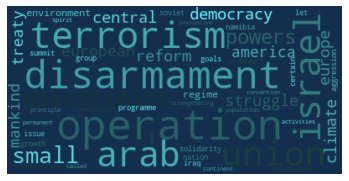

In [89]:
# Generate a word cloud image
wordcloud2 = WordCloud(stopwords=ENGLISH_STOP_WORDS, background_color="#142f4e",max_font_size=50, max_words=50).generate_from_frequencies(wc)

# Display the generated image:

plt.imshow(wordcloud2.recolor(color_func=get_single_color_func("#5ce1e6"), random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.show()

In [90]:
# Save the image
wordcloud2.to_file("./Plots/word_cloud2.png")

# 4 topics, max_df = 0.5

In [93]:
# 2: create dtm
vec = CountVectorizer(stop_words = 'english', max_df=0.5)
X = vec.fit_transform(df["text"])


# 3 create lda
lda = LatentDirichletAllocation(n_components=4)

# 4 fit lda
doc_topics = lda.fit_transform(X)

## Get feature names (vocabulary)
voc = np.array(vec.get_feature_names_out())

# Set number of top words you want
n_words=5

# Create lambda function to extract top words from voc
imp_words = lambda x: [voc[each] for each in np.argsort(x)[:-n_words-1:-1]]

# Use imp_words to extract words with the highest weights from our lda model
words_in_topic = ([imp_words(x) for x in lda.components_])

# Examine words
words_in_topic



[['european', 'reform', 'treaty', 'climate', 'small'],
 ['operation', 'disarmament', 'powers', 'struggle', 'namibia'],
 ['arab', 'israel', 'iraq', 'palestinian', 'terrorism'],
 ['democracy', 'small', 'sustainable', 'goals', 'climate']]

# 6 topics?

In [126]:
# 2: create dtm
vec = CountVectorizer(stop_words = 'english', max_df=0.5)
X = vec.fit_transform(df["text"])


# 3 create lda
lda = LatentDirichletAllocation(n_components=6)

# 4 fit lda
doc_topics = lda.fit_transform(X)

## Get feature names (vocabulary)
voc = np.array(vec.get_feature_names_out())

# Set number of top words you want
n_words=5

# Create lambda function to extract top words from voc
imp_words = lambda x: [voc[each] for each in np.argsort(x)[:-n_words-1:-1]]

# Use imp_words to extract words with the highest weights from our lda model
words_in_topic = ([imp_words(x) for x in lda.components_])

# Examine words
words_in_topic



[['democracy', 'terrorism', 'reform', 'central', 'solidarity'],
 ['israel', 'arab', 'palestinian', 'iraq', 'israeli'],
 ['european', 'europe', 'treaty', 'environment', 'union'],
 ['operation', 'namibia', 'mankind', 'apartheid', 'america'],
 ['operation', 'disarmament', 'soviet', 'struggle', 'powers'],
 ['climate', 'small', 'sustainable', 'terrorism', 'goals']]

# Add lemmatization

In [125]:
# # 2: create dtm

# vec = CountVectorizer(stop_words = 'english',
#                       max_df=0.5,
#                       strip_accents = 'unicode',  
#                       lowercase = True, 
#                       tokenizer=LemmaTokenizer())
# X = vec.fit_transform(df["text"])


# # 3 create lda
# lda = LatentDirichletAllocation(n_components=4)

# # 4 fit lda
# doc_topics = lda.fit_transform(X)

# ## Get feature names (vocabulary)
# voc = np.array(vec.get_feature_names_out())

# # Set number of top words you want
# n_words=5

# # Create lambda function to extract top words from voc
# imp_words = lambda x: [voc[each] for each in np.argsort(x)[:-n_words-1:-1]]

# # Use imp_words to extract words with the highest weights from our lda model
# words_in_topic = ([imp_words(x) for x in lda.components_])

# # Examine words
# words_in_topic



[['—', 'america', 'democracy', '’', 'american'],
 ['’', 'climate', 'sustainable', 'island', '—'],
 ['co-operation', "'", 'disarmament', 'struggle', 'regime'],
 ['’', 'terrorism', 'european', 'iraq', 'arab']]

In [112]:
# #NORMALIZE STOPWORDS
# #https://stackoverflow.com/questions/57340142/user-warning-your-stop-words-may-be-inconsistent-with-your-preprocessing

# def replace_ptbr_char_by_word(word):
#     '''
#     Will remove the encode token by token
#     '''   
#     word = str(word)
#     word = normalize('NFKD', word).encode('ASCII','ignore').decode('ASCII')
#     return word

# def remove_pt_br_char_by_text(text):
#     '''   
#     Will remove the encode using the entire text
#     '''    
#     text = str(text)
#     text = " ".join(replace_ptbr_char_by_word(word) for word in text.split() if word not in ENGLISH_STOP_WORDS)
#     return text

In [124]:
# df['text_norm'] = df['text'].apply(remove_pt_br_char_by_text)

In [114]:
# #https://stackoverflow.com/questions/47423854/sklearn-adding-lemmatizer-to-countvectorizer
# vec = CountVectorizer(stop_words = 'english', max_df=0.5, tokenizer=LemmaTokenizer())
# X = vec.fit_transform(df["text"])


# # 3 create lda
# lda = LatentDirichletAllocation(n_components=4)

# # 4 fit lda
# doc_topics = lda.fit_transform(X)

# ## Get feature names (vocabulary)
# voc = np.array(vec.get_feature_names_out())

# # Set number of top words you want
# n_words=5

# # Create lambda function to extract top words from voc
# imp_words = lambda x: [voc[each] for each in np.argsort(x)[:-n_words-1:-1]]

# # Use imp_words to extract words with the highest weights from our lda model
# words_in_topic = ([imp_words(x) for x in lda.components_])

# # Examine words
# words_in_topic



[['terrorism', 'democracy', 'european', 'union', 'summit'],
 ['-', 'america', '?', 'american', 'democracy'],
 ['co-operation', "'", 'disarmament', 'israel', 'arab'],
 ['small', 'island', 'climate', 'pacific', 'caribbean']]

# What words are getting dropped by max_df?

In [18]:
# df = pd.read_csv("un_gen_debates_text.csv")
# df= df[(df.year >= 1980) & (df.year <= 1990)]
# df= df[(df.year >= 1998) & (df.year <= 2000) & (df.country=="USA")]
# df= df[(df.year >= 2001) & (df.country=="SAU")]

In [22]:
# Define function to print out words dropped from using max_df 
def compare_dropped_words(text_column, value1, value2):
    """Get list of words dropped depending on max_df setting for CountVectorizer.

    Keyword arguments:
    text_column -- column with text
    value1 -- first value for max_df; set to 1.0 if don't want to ignore any terms
    value2 -- second value for max_df 
    """
    # Initialize CountVectorizer 
    vect1 = CountVectorizer(stop_words = 'english', max_df =value1)
    matrix1 = vect1.fit_transform(text_column)
    array1 = vect1.get_feature_names_out()
    
    # Initialize CountVectorizer with max_df
    vect2 = CountVectorizer(stop_words = 'english', max_df = value2)
    matrix2 = vect2.fit_transform(text_column)
    array2 = vect2.get_feature_names_out()
    
    # Return the difference between 2 lists
    dropped_words = list(set(array1) - set(array2))

    if value1 == 1.0:
        print('Dropped words if setting max_df as', value2, 'compared to not setting max_df')
    else:
        print('Dropped words if setting max_df as', value2, 'compared to', value1)       
    
    return dropped_words
    

In [23]:
dw95 = compare_dropped_words(df['text'],1.0,0.95)

Dropped words if setting max_df as 0.95 compared to not setting max_df


In [24]:
dw90 = compare_dropped_words(df['text'],0.95,0.90)

Dropped words if setting max_df as 0.9 compared to 0.95


In [25]:
dw85 = compare_dropped_words(df['text'],0.90,0.85)

Dropped words if setting max_df as 0.85 compared to 0.9


In [26]:
dw80 = compare_dropped_words(df['text'],0.85,0.80)

Dropped words if setting max_df as 0.8 compared to 0.85


In [27]:
dw75 = compare_dropped_words(df['text'],0.80,0.75)

Dropped words if setting max_df as 0.75 compared to 0.8


In [28]:
dw70 = compare_dropped_words(df['text'],0.75,0.70)

Dropped words if setting max_df as 0.7 compared to 0.75
